In [1]:
import os 
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
from pyarrow import feather
from scipy.stats import sem

plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (10, 10)

In [2]:
#move up in directory
os.chdir('../')

from helpers import dot2_

In [3]:
os.getcwd()

'C:\\Users\\Bio_Psych\\Desktop\\Deniz\\tf-cpu\\p1_generalization'

In [4]:
### CONFIG

PATH_HUMAN_DATA = 'data/human_raw_data/'
HUMAN_DATA_NAME = 'data_chakroun_wiehler.csv'

# number of human subjects
N_SUBS = 31
# number of trials (human & RNN)
N_TRIALS = 300

# path tp RNN data
PATH_RNN_DATA ='data/rnn_raw_data/'

# keys are labels for RNNs, values are filenames
RNN_DICT = {
#   "Unit: LSTM; Noise: Update-dependent; Entropy: None; Algorithm: A2C": PATH_RNN_DATA + "lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
#   "Unit: LSTM; Noise: Update-dependent; Entropy: Fixed; Algorithm: A2C": PATH_RNN_DATA + "lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
#   "Unit: LSTM; Noise: Update-dependent; Entropy: Annealed; Algorithm: A2C": PATH_RNN_DATA + "lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
#   #"Unit: LSTM; Noise: Update-dependent; Entropy: None; Algorithm: A2C; NO PUNISH": PATH_RNN_DATA + "lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_no_punish_test_b_daw_p_{}_check",
  
#   # TO DO "Unit: LSTM; Noise: None; Entropy: None; Algorithm: A2C
#   "Unit: LSTM; Noise: None; Entropy: None; Algorithm: A2C": PATH_RNN_DATA + "lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
#   "Unit: LSTM; Noise: None; Entropy: Fixed; Algorithm: A2C": PATH_RNN_DATA + "lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
#   "Unit: LSTM; Noise: None; Entropy: Annealed; Algorithm: A2C": PATH_RNN_DATA + "lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  
  
#   "Unit: LSTM; Noise: Update-dependent; Entropy: None; Algorithm: REINFORCE": PATH_RNN_DATA + "lstm2_rei_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
#   "Unit: LSTM; Noise: Update-dependent; Entropy: Fixed; Algorithm: REINFORCE": PATH_RNN_DATA + "lstm2_rei_nh_48_lr_0_0001_n_u_p_0_5_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
#   "Unit: LSTM; Noise: Update-dependent; Entropy: Annealed; Algorithm: REINFORCE":  PATH_RNN_DATA + "lstm2_rei_nh_48_lr_0_0001_n_u_p_0_5_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
    
#   "Unit: LSTM; Noise: None; Entropy: None; Algorithm: REINFORCE": PATH_RNN_DATA + "lstm_rei_nh_48_lr_0_0001_n_n_p_0_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
#   "Unit: LSTM; Noise: None; Entropy: Fixed; Algorithm: REINFORCE": PATH_RNN_DATA + "lstm_rei_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
#   "Unit: LSTM; Noise: None; Entropy: Annealed; Algorithm: REINFORCE": PATH_RNN_DATA + "lstm_rei_nh_48_lr_0_0001_n_n_p_0_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  
  #TODO 12 Models for RNN
      "Unit: RNN; Noise: Update-dependent; Entropy: Fixed; Algorithm: A2C": PATH_RNN_DATA + "rnn_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}"
    
}



# TODO
# müssen noch 0-10 ids trainiert werden
# "Unit: LSTM; Noise: None; Entropy: None; Algorithm: A2C": PATH_RNN_DATA + "lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",


In [5]:
# cumulative regret for human data

human_df = pd.read_csv(open(PATH_HUMAN_DATA + HUMAN_DATA_NAME, 'rb'), index_col=0)


cum_reg_human = np.zeros([N_TRIALS,N_SUBS])

for sub in range(1,N_SUBS+1):
    sub_df = human_df.loc[human_df.vp == sub,:]
    chosen_reward = [[p1,p2,p3,p4][ch-1] if ch != 0 else np.mean([p1,p2,p3,p4]) for ch, p1, p2, p3, p4 in zip(sub_df['choice'], sub_df['reward_b1'], sub_df['reward_b2'], sub_df['reward_b3'], sub_df['reward_b4'])]
    sub_df['reward'] = chosen_reward
    best_reward = np.array(np.max(sub_df[['reward_b1', 'reward_b2', 'reward_b3', 'reward_b4']], axis = 1))
    # calculate cumulative regret
    cum_reg_human[:,sub-1] = np.cumsum(best_reward - chosen_reward)

C:\Users\Bio_Psych\anaconda3\envs\tf_cpu\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Bio_Psych\anaconda3\envs\tf_cpu\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Bio_Psych\anaconda3\envs\tf_cpu\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set 

In [38]:
# define function to calculate cumulative regret for RNN data
def get_regret_rnn(file_path, n_trials = 300, n_walks = 3, n_ids = 30):

    cum_reg_lstm = np.zeros([n_trials,n_ids*n_walks])

    for id_ in range(n_ids):
        for walk in range(1,4):
            
            d = pickle.load(open(file_path.format(id_, walk), 'rb'))
            df = d.reset_index()
            chosen_reward = [[p1,p2,p3,p4][ch] for ch, p1, p2, p3, p4 in zip(df['choice'], df['p_rew_1'], df['p_rew_2'], df['p_rew_3'], df['p_rew_4'])]
            best_reward = np.array(np.max(df[['p_rew_1', 'p_rew_2', 'p_rew_3', 'p_rew_4']], axis = 1))
            
            
            # calculate cumulative regret (mult with 100 to compare to human data)
            cum_reg_lstm[:,(n_ids*(walk-1))+id_] = np.cumsum(np.multiply(best_reward,100) - np.multiply(chosen_reward,100))
            
    return(cum_reg_lstm)

RNN
747.3005475157056
3.2177818584124664
Human
713.9065418252201
5.345841816590718


Text(0, 0.5, 'Cumulative regret')

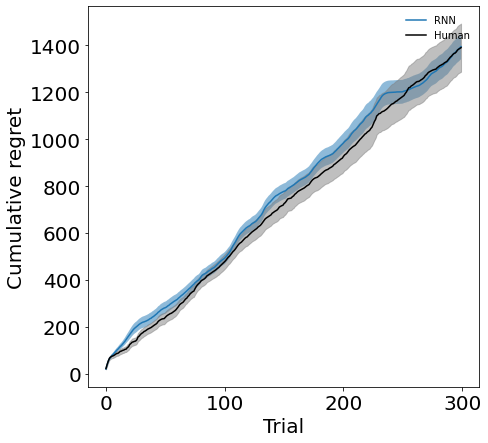

In [39]:
# plot cumulative regret

# RNNs
for key, value in RNN_DICT.items():
    
    regret = get_regret_rnn(value, n_ids = 30)
    se = sem(regret, axis = 1)
    mean_regret = np.mean(regret, axis = 1)
    
    plt.plot(mean_regret, label = key)
    plt.fill_between(range(N_TRIALS), mean_regret - se, mean_regret + se, alpha=0.5)
    
    print(key)
    print(np.mean(regret.flatten()))
    print(sem(regret.flatten()))

# human
mean_regret = np.mean(cum_reg_human, axis = 1)
se = sem(cum_reg_human, axis = 1)
plt.plot(mean_regret, color = 'black', label = 'Human')
plt.fill_between(range(N_TRIALS), mean_regret - se, mean_regret + se, color = 'grey', alpha=0.5)
   
plt.legend(frameon= False, prop={'size': 10})

print('Human')
print(np.mean(cum_reg_human.flatten()))
print(sem(cum_reg_human.flatten()))

plt.xlabel('Trial')
plt.ylabel('Cumulative regret')

#plt.savefig('../p1_generalization/plots/regret_plot_all.png', dpi = 300)

    
    
    
    

RNN
747.3005475157056
3.2177818584124664
Human
713.9065418252201
5.345841816590718


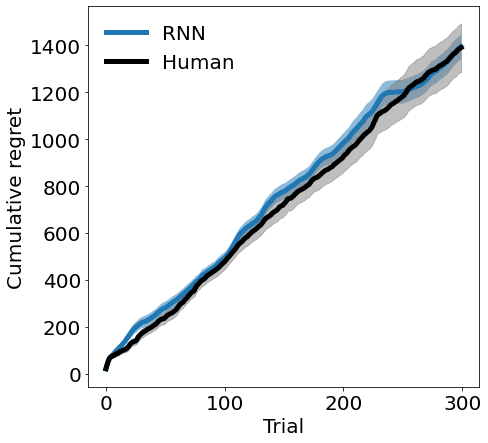

In [40]:
plt.rcParams.update({'font.size': 20})
plt.rcParams["figure.figsize"] = (7, 7)

# plot the best RNNs

RNN_DICT = {
  "RNN": PATH_RNN_DATA + "lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
#   "Unit: LSTM; Noise: Update-dependent; Entropy: Fixed; Algorithm: A2C": PATH_RNN_DATA + "lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
#   "Unit: LSTM; Noise: Update-dependent; Entropy: Annealed; Algorithm: A2C": PATH_RNN_DATA + "lstm2_a2c_nh_48_lr_0_0001_n_u_p_0_5_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  
  # TO DO "Unit: LSTM; Noise: None; Entropy: None; Algorithm: A2C
#   "Unit: LSTM; Noise: None; Entropy: Fixed; Algorithm: A2C": PATH_RNN_DATA + "lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
#   "Unit: LSTM; Noise: None; Entropy: Annealed; Algorithm: A2C": PATH_RNN_DATA + "lstm_a2c_nh_48_lr_0_0001_n_n_p_0_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",

  #"Unit: LSTM; Noise: Update-dependent; Entropy: None; Algorithm: REINFORCE": PATH_RNN_DATA + "lstm2_rei_nh_48_lr_0_0001_n_u_p_0_5_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  # TO DO "Unit: LSTM; Noise: Update-dependent; Entropy: Fixed; Algorithm: REINFORCE"
  # TO DO "Unit: LSTM; Noise: Update-dependent; Entropy: Annealed; Algorithm: REINFORCE"
    
#   "Unit: LSTM; Noise: None; Entropy: None; Algorithm: REINFORCE": PATH_RNN_DATA + "lstm_rei_nh_48_lr_0_0001_n_n_p_0_ew_0_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
#   "Unit: LSTM; Noise: None; Entropy: Fixed; Algorithm: REINFORCE": PATH_RNN_DATA + "lstm_rei_nh_48_lr_0_0001_n_n_p_0_ew_0_05_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
#   "Unit: LSTM; Noise: None; Entropy: Annealed; Algorithm: REINFORCE": PATH_RNN_DATA + "lstm_rei_nh_48_lr_0_0001_n_n_p_0_ew_lin_vw_0_5_dr_0_5_res_d_f_p_0_1_rt_con_a_4_n_300_te_50000_id_{}_test_b_daw_p_{}",
  
  #TODO 12 Models for RNN
}

# RNNs
for key, value in RNN_DICT.items():
    
    regret = get_regret_rnn(value)
    se = sem(regret, axis = 1)
    mean_regret = np.mean(regret, axis = 1)
    
    plt.plot(mean_regret, label = key, linewidth = 5)
    plt.fill_between(range(N_TRIALS), mean_regret - se, mean_regret + se, alpha=0.5)
    
    print(key)
    print(np.mean(regret.flatten()))
    print(sem(regret.flatten()))

# human
mean_regret = np.mean(cum_reg_human, axis = 1)
se = sem(cum_reg_human, axis = 1)
plt.plot(mean_regret, color = 'black', label = 'Human', linewidth = 5)
plt.fill_between(range(N_TRIALS), mean_regret - se, mean_regret + se, color = 'grey', alpha=0.5)
   
plt.legend(frameon= False, prop={'size': 20})

print('Human')
print(np.mean(cum_reg_human.flatten()))
print(sem(cum_reg_human.flatten()))

plt.xlabel('Trial')
plt.ylabel('Cumulative regret')

#plt.savefig('../p1_generalization/plots/regret_plot_best.pdf', dpi = 600)
plt.show()

In [41]:
np.mean(last_cum_reg_rnn)
sem(last_cum_reg_rnn)

63.57890532117017

In [42]:
np.mean(last_cum_reg_human)
sem(last_cum_reg_human)

102.52788934844854

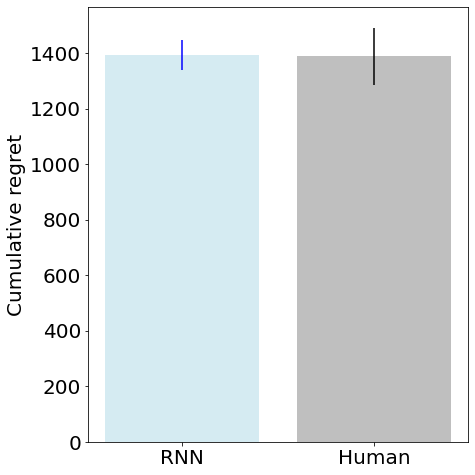

In [46]:
# cumulative regret in last trial as barplot
last_cum_reg_human = cum_reg_human[N_TRIALS-1,:]
mean_cum_reg_human = np.mean(last_cum_reg_human)
sem_reg_human = sem(last_cum_reg_human)

last_cum_reg_rnn = regret[N_TRIALS-1,:]
mean_cum_reg_rnn = np.mean(last_cum_reg_rnn)
sem_reg_rnn = sem(last_cum_reg_rnn)

plt.bar(["RNN", "Human"],
        [mean_cum_reg_rnn, mean_cum_reg_human],
       color = ["lightblue", "grey"], alpha = 0.5)

plt.errorbar(["RNN", "Human"],
             [mean_cum_reg_rnn, mean_cum_reg_human],
             yerr=[sem_reg_rnn, sem_reg_human],
             fmt='none',
             ecolor=['blue', 'black'])

plt.ylabel("Cumulative regret")

plt.tight_layout()
plt.savefig('../p1_generalization/plots/Figure_2_A.png', dpi = 600)


In [44]:
# save cumulative regret for jasp analysis

# cumulative regret in last trial is relevant
last_cum_reg_human = cum_reg_human[N_TRIALS-1,:]
last_cum_reg_rnn = regret[N_TRIALS-1,:]

# create df
df = pd.DataFrame({'cum_reg': np.append(last_cum_reg_human, last_cum_reg_rnn),
             'agent': np.append(len(last_cum_reg_human)*['Human'], len(last_cum_reg_rnn)*['RNN'])})

# save df
df.to_csv('data/intermediate_data/jasp_analysis/regret_t_test_data.csv')